# ECON 148 Final Project



# Social Capital II: Determinants of Economic Connectedness

### Group Members:
Hao Li (Interpretation, Project background and objective), Nagi Kasuya (Interpretation, Data and variable description), Dmitry Pokhilko (Code, analysis), Vidya Venkatachalam (Code, analysis), Jessica Wei (Interpretation and Conclusions).


## Project Requirements
**(delete this markdown cell in your final submission)**

**How to use this notebook**:  This notebook is the template for your final project.  Each markdown cell provides instructions on what to do in order to complete a successful project.  The cell you're reading right now is the only one you can delete from what you eventually hand in.  For the other cells:
1. You may replace the instructions in each cell with your own work but do not edit the cell titles (with the exception of the project title, above).  
2. Follow the instructions in each section carefully.  For some sections you will enter only markdown text in the existing cells. For other sections, you'll accompany the markdown cells with additional code cells, and perhaps more markdown, before moving on to the next section.  

**Deliverables**.  You'll see point allocations listed in each of the section titles below.  In addition, there are other categories for points:
1. Project background and objective (5 points).
2. Data and variable description (5 points).
3. Exploratory Data Analysis (EDA): Inferential statistics, Principal Component Analysis (PCA), handling numerical and categorical variables separately, feature engineering, and so on. (30 points).
4. Modeling: Econometric and machine learning (ML) models with the main idea of using ML models to see if there is improvement in econometric models (30 points).
5. Interpretation and Conclusions (10 points).
6. Presentation (15 points).
7. Reproducibility (5 points). (Each group should create github account for reproducibility of the project for each).

**Grading**. For each section, we will award points according to the following percentage scale:
1. Excellent (above 90%): Work that is free of all but the most minor errors and demonstrates creativity and/or a very deep understanding of what you are doing.
2. Good (80-90%): Work that is free of fundamental errors and demonstrates a basic understanding of what you're doing.
3. Fair (60-80%): Work with fundamental errors in analysis and/or conveys a lack of understanding of the basics of the work you are attempting to do.
4. Lacking (below 60%): Work that is severely lacking or incomplete.  

Note that we distinguish **mistakes** from **"my idea didn't work"**.  Sometimes you don't know if you can actually do the thing you're trying to do and as you dig in you find that you can't.  That doesn't necessarily mean you made a mistake; it might just mean you needed more information.  We'll still give high marks to ambitious projects that "fail" at their stated objective, as long as that objective was clear and you demonstrate an understanding of what you were doing and why it didn't work.

**Number of prediction questions:**  Your group should work with **two** prediction questions in the project. Questions should be related, but have distinct work efforts, interpretation and analysis. See Modeling section for more detail.

An example: for land use regression (see section notebook 11), you could have a core prediction question (what is pollution concentration on a fine spatial scale), a supporting question that explore how the degree of spatial aggregation influences prediction quality, plus a prediction model that explores *temporal* prediction at one point in space.  There is a lot of flexibility here; if you have any doubt about whether your questions are distinct, consult with Peter, Yiyang, or Prof. Van Dusen.

## Source Data - Opportunity Insights

In order to make the project consistent across teams, we are limiting the project to a specific set of datasets that are linked to economics journal articles.  

Browse and choose one of the datasets from (https://opportunityinsights.org/data/). You will find them neatly presented (and mostly cleaned) together with the title of the corresponding research paper.

You should start by reading the corresponding paper, and start your analysis by exploring some of the claims or analysis that you find in the paper (it is not your goal to fully replicate the analysis in the paper). You should then propose some new analysis that you can do with the dataset.


## Abstract (5 points)
Although this section comes first, you'll write it last.  It should be a ~150 word summary of your project.  1/3rd of the abstract should provide background, 1/3rd should explain what you did, and 1/3rd should explain what you learned.

## Project Background (5 points)
These two papers co-authored by Raj Chetty and other scholars utilize Facebook data to analyze social interactions across different socioeconomic strata in the United States and their impacts on economic mobility. These studies provide a window into understanding and enhancing social capital through social network data, which is crucial for designing policies that can boost socioeconomic mobility.

The first paper, titled "Social Capital II: Determinants of Economic Connectedness," published in the journal *Nature*, extensively explores the determinants of cross-class social interactions. The research reveals that about half of the social disconnection between individuals of lower socioeconomic status (SES) and higher SES can be attributed to "exposure," meaning that individuals of lower SES have fewer opportunities to encounter higher SES individuals in their social environments. The other half of the disconnection is explained by "friending bias," where, even in mixed SES settings, individuals of lower SES are less likely to form friendships with those of higher SES than expected. The study also notes that reducing friending bias and increasing interactions among different socioeconomic groups can significantly enhance economic connections.

The second paper, published by the NBER, further analyzes the impact of economic connectedness on social mobility, particularly intergenerational economic mobility. This research underscores the importance of enhancing interactions between different socioeconomic groups to improve the chances of upward mobility for individuals with lower socioeconomic status. Through an analysis of social network data, the study reveals which types of environments are most effective at increasing economic connections, such as schools or communities with low friending bias where increasing the proportion of higher SES individuals can significantly boost cross-class friendships.

The empirical results from these studies provide robust data support for policymakers, demonstrating that strategically reducing barriers and biases between different socioeconomic groups can effectively enhance both social capital and economic mobility within communities. Specific strategies include promoting socioeconomic integration in communities and educational institutions, as well as encouraging more cross-class interactions within existing social circles. These studies also highlight the role of quantitative analysis in designing and evaluating social policies, showcasing how social network analysis can advance socioeconomic mobility.

## Project Objective (5 points)
The central objective of this semester project is to quantitatively assess how factors such as economic connectedness (EC), high-socioeconomic status (SES) exposure, and friending bias influence upward income mobility across different geographic regions. This will be approached through the replication and extension of analyses found in existing economic studies, focusing on the relationships between these social capital factors and income mobility.
Two main project objectives:
1. Enhance the dataset through Explanatory Data Analysis to improve the Ordinary Least Squares (OLS) regression model's R-squared (R²) value for more accurate and reliable predictions.
2. Develop and apply various machine learning models, compare their performance, and choose the best one to improve the predictive accuracy of the paper.

## Data Description (5 points)
Here you will provide an initial description of your data sets, including:
1. The origins of your data.  What is the corresponding paper of your data?
2. The structure, granularity, scope, temporality and faithfulness (SGSTF) of your data.  To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time).  At a minimum, use some basic methods (`.head`, `.loc`, and so on) to provide support for the descriptions you provide for SGSTF.
3. You should also describe which data fields you will use as your target variables (explained variables), and which you will use as features (explanatory variables).  

You will want to read the paper carefully and summarize in your own words how the Opportunity Insights team has constructed the datasets.  

In [ ]:
import pandas as pd #for building dataframes from CSV files
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
df_1 = pd.read_csv(r"C:\Users\dupok\Downloads\social_capital_zip.csv")
df_2=pd.read_csv(r"C:\Users\dupok\Downloads\zip_mobility_data.csv")
df_1.head()


,zip,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.10572,0.94526,0.05650,0.01080
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.10340,0.90163,0.14951,0.03688
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.13650,0.76924,0.10501,0.08050
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.10554,0.95837,0.15862,0.02163
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.10391,0.94873,0.13053,0.01690


In [ ]:
df_2.head()

,Unnamed: 0,zip,kfr_pooled_pooled_p25,pop2018,num_below_p50
0,0,36006,0.375984,913,210.877877
1,1,36003,0.339764,1898,380.852783
2,2,36066,0.404268,19097,1261.963181
3,3,36051,0.360447,2106,278.664883
4,4,36067,0.351230,28727,3396.898229


We will be using two dataframes for this analysis: the first one contains the explanatory variables, while the second one contains the dependent variable.
The origins of our data are zip_mobility_data.dta and county_mobility_data.dta.
Corresponding paper of our data is.

SGSTF of our data

Structure: csv file.

Granularity: Each line corresponds to a specific ZIP code and provides detailed regional-level information.

Scope: Specific U.S. ZIP codes. Indicators included include population, economic index, clustering, volunteer rates, and a wide variety of other data.

Temporality:　This dataset does not contain data regarding any other years other than 2018 and can be considered static.

Faithfulness: Fidelity is high due to the zero source of data and reliable indicators of population data, economic index, clustering data, volunteer rate, and number of civic organizations.

## Data Cleaning (5 points)


We merged the selected data files, social_capital_zip.csv and zip_mobility_data.csv, by performing an inner join on the "zip" column present in both DataFrames. During this process, only rows with matching ZIP code values in both DataFrames were included in the final merged DataFrame, which helps ensure consistency between combined metrics. Finally, the merged DataFrame, combined_df, was written into a new CSV file named "combined_dataframe.csv."

In [ ]:
df_1 = pd.read_csv(r"C:\Users\dupok\Downloads\social_capital_zip.csv")
df_2=pd.read_csv(r"C:\Users\dupok\Downloads\zip_mobility_data.csv")
combined_df = pd.merge(df_1, df_2, on='zip', how='inner')
combined_df.to_csv('combined_dataframe.csv', index=False)
combined_df.head()

,zip,county,num_below_p50_x,pop2018_x,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip,Unnamed: 0,kfr_pooled_pooled_p25,pop2018_y,num_below_p50_y
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,-0.00336,-0.21186,0.10572,0.94526,0.05650,0.01080,12760,0.468741,17621,995.787468
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,0.18724,-0.24353,0.10340,0.90163,0.14951,0.03688,12797,0.475851,30066,1312.117077
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,NaN,NaN,0.13650,0.76924,0.10501,0.08050,12810,NaN,11238,NaN
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,-0.00064,-0.11397,0.10554,0.95837,0.15862,0.02163,13025,0.407809,4991,381.519745
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,0.04162,-0.21283,0.10391,0.94873,0.13053,0.01690,12796,0.476621,14967,915.396667


In [ ]:
missing_variables = combined_df.isnull().sum()
print(missing_variables)

zip                             0
county                          2
num_below_p50_x                17
pop2018_x                       0
ec_zip                       4041
ec_se_zip                    4041
nbhd_ec_zip                  8735
ec_grp_mem_zip               4684
ec_high_zip                  4041
ec_high_se_zip               4041
nbhd_ec_high_zip             8735
ec_grp_mem_high_zip          4684
exposure_grp_mem_zip         4684
exposure_grp_mem_high_zip    4684
nbhd_exposure_zip            8735
bias_grp_mem_zip             4684
bias_grp_mem_high_zip        4684
nbhd_bias_zip                8735
nbhd_bias_high_zip           8735
clustering_zip                  0
support_ratio_zip               0
volunteering_rate_zip           3
civic_organizations_zip       372
Unnamed: 0                      0
kfr_pooled_pooled_p25          17
pop2018_y                       0
num_below_p50_y                17
dtype: int64


In [ ]:
# Drop rows with NaN values in specific columns
combined_df.dropna(subset=['ec_zip', 'kfr_pooled_pooled_p25', 'county'], inplace=True)
combined_df.head()

,zip,county,num_below_p50_x,pop2018_x,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip,Unnamed: 0,kfr_pooled_pooled_p25,pop2018_y,num_below_p50_y
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,-0.00336,-0.21186,0.10572,0.94526,0.05650,0.01080,12760,0.468741,17621,995.787468
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,0.18724,-0.24353,0.10340,0.90163,0.14951,0.03688,12797,0.475851,30066,1312.117077
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,-0.00064,-0.11397,0.10554,0.95837,0.15862,0.02163,13025,0.407809,4991,381.519745
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,0.04162,-0.21283,0.10391,0.94873,0.13053,0.01690,12796,0.476621,14967,915.396667
6,1010,25013.0,312.542969,3739,0.73856,0.05810,NaN,NaN,1.47973,0.02565,...,NaN,NaN,0.09408,0.89302,0.08233,0.03171,12788,0.492584,3739,312.542969


After merging the data, we calculated the total number of missing values (NaN) for each column in combined_df and printed the results. We updated the original DataFrame by removing rows that were missing data in any of the specified columns of combined_df. Lastly, we created a new DataFrame df_eda that only includes specified columns from combined_df, intended for subsequent exploratory data analysis (EDA).

## Exploratory Data Analysis (20 points)

In this section you should provide a tour through some of the basic trends and patterns in your data.  This includes providing initial plots to summarize the data, such as box plots, histograms, violin plots, trends over time, scatter plots relating one variable or another etc. Plots should be well organized, legible, labeled, and well-suited to the question they are being used to answer or explore.  

Because so many of these datasets have a geographic component a strech goal would be to map some of the data with the variables of interest. This is not required though.

In [ ]:
combined_df.columns

Index(['zip', 'county', 'num_below_p50_x', 'pop2018_x', 'ec_zip', 'ec_se_zip',
       'nbhd_ec_zip', 'ec_grp_mem_zip', 'ec_high_zip', 'ec_high_se_zip',
       'nbhd_ec_high_zip', 'ec_grp_mem_high_zip', 'exposure_grp_mem_zip',
       'exposure_grp_mem_high_zip', 'nbhd_exposure_zip', 'bias_grp_mem_zip',
       'bias_grp_mem_high_zip', 'nbhd_bias_zip', 'nbhd_bias_high_zip',
       'clustering_zip', 'support_ratio_zip', 'volunteering_rate_zip',
       'civic_organizations_zip', 'Unnamed: 0', 'kfr_pooled_pooled_p25',
       'pop2018_y', 'num_below_p50_y'],
      dtype='object')

In [ ]:
df_eda = combined_df[['ec_zip', 'nbhd_bias_high_zip', 'kfr_pooled_pooled_p25', 'bias_grp_mem_high_zip', 'nbhd_bias_zip', 'ec_high_zip', 'nbhd_ec_high_zip']].copy()
# 1. Basic Information
print("Shape of DataFrame:", df_eda.shape)
print("Columns in DataFrame:", df_eda.columns)
print("Data Types:", df_eda.dtypes)

Shape of DataFrame: (18967, 7)
Columns in DataFrame: Index(['ec_zip', 'nbhd_bias_high_zip', 'kfr_pooled_pooled_p25',
       'bias_grp_mem_high_zip', 'nbhd_bias_zip', 'ec_high_zip',
       'nbhd_ec_high_zip'],
      dtype='object')
Data Types: ec_zip                   float64
nbhd_bias_high_zip       float64
kfr_pooled_pooled_p25    float64
bias_grp_mem_high_zip    float64
nbhd_bias_zip            float64
ec_high_zip              float64
nbhd_ec_high_zip         float64
dtype: object


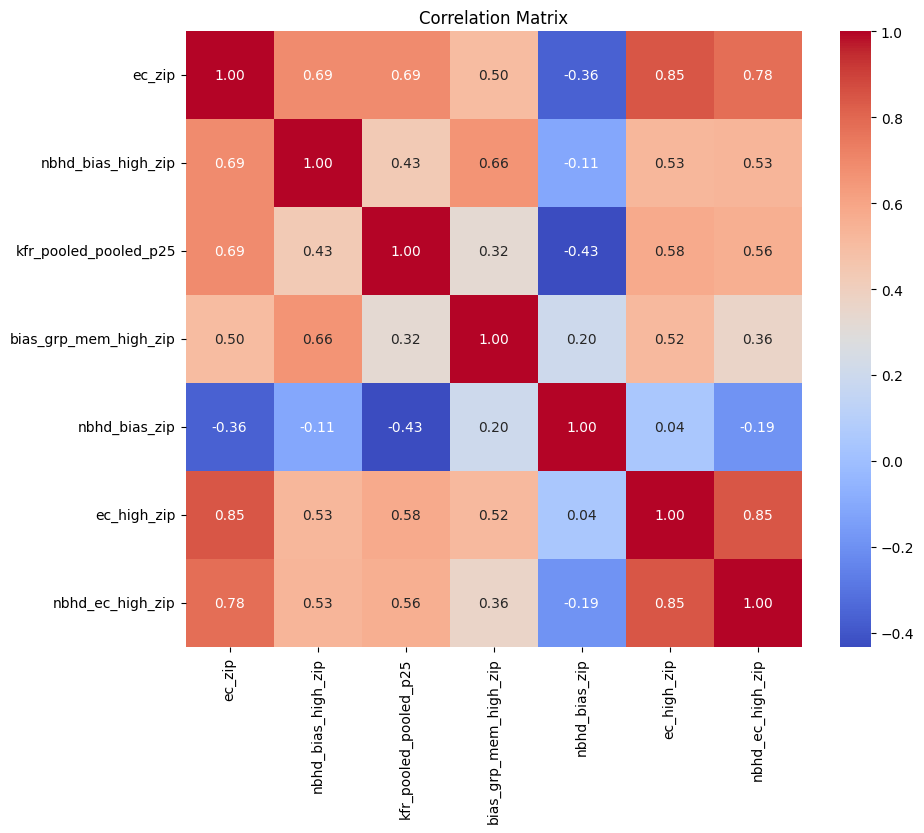

In [ ]:
# Plotting the correlation matrix
correlation_matrix = df_eda.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

Feature Selection and Correlation Evaluation
To evaluate the relationships among the numerical variables in the dataset, we first created a correlation matrix. The correlation matrix calculates the Pearson correlation coefficients between each pair of variables, indicating the strength and direction of their linear relationships. Notably, the ec_zip variable was found to have a strong positive correlation with the target variable. Specifically, the correlation coefficient for ec_zip was higher compared to other variables, indicating that ec_zip has a significant impact on the target variable. This high correlation coefficient suggests that ec_zip is a valuable feature for explaining the variation in the target variable.

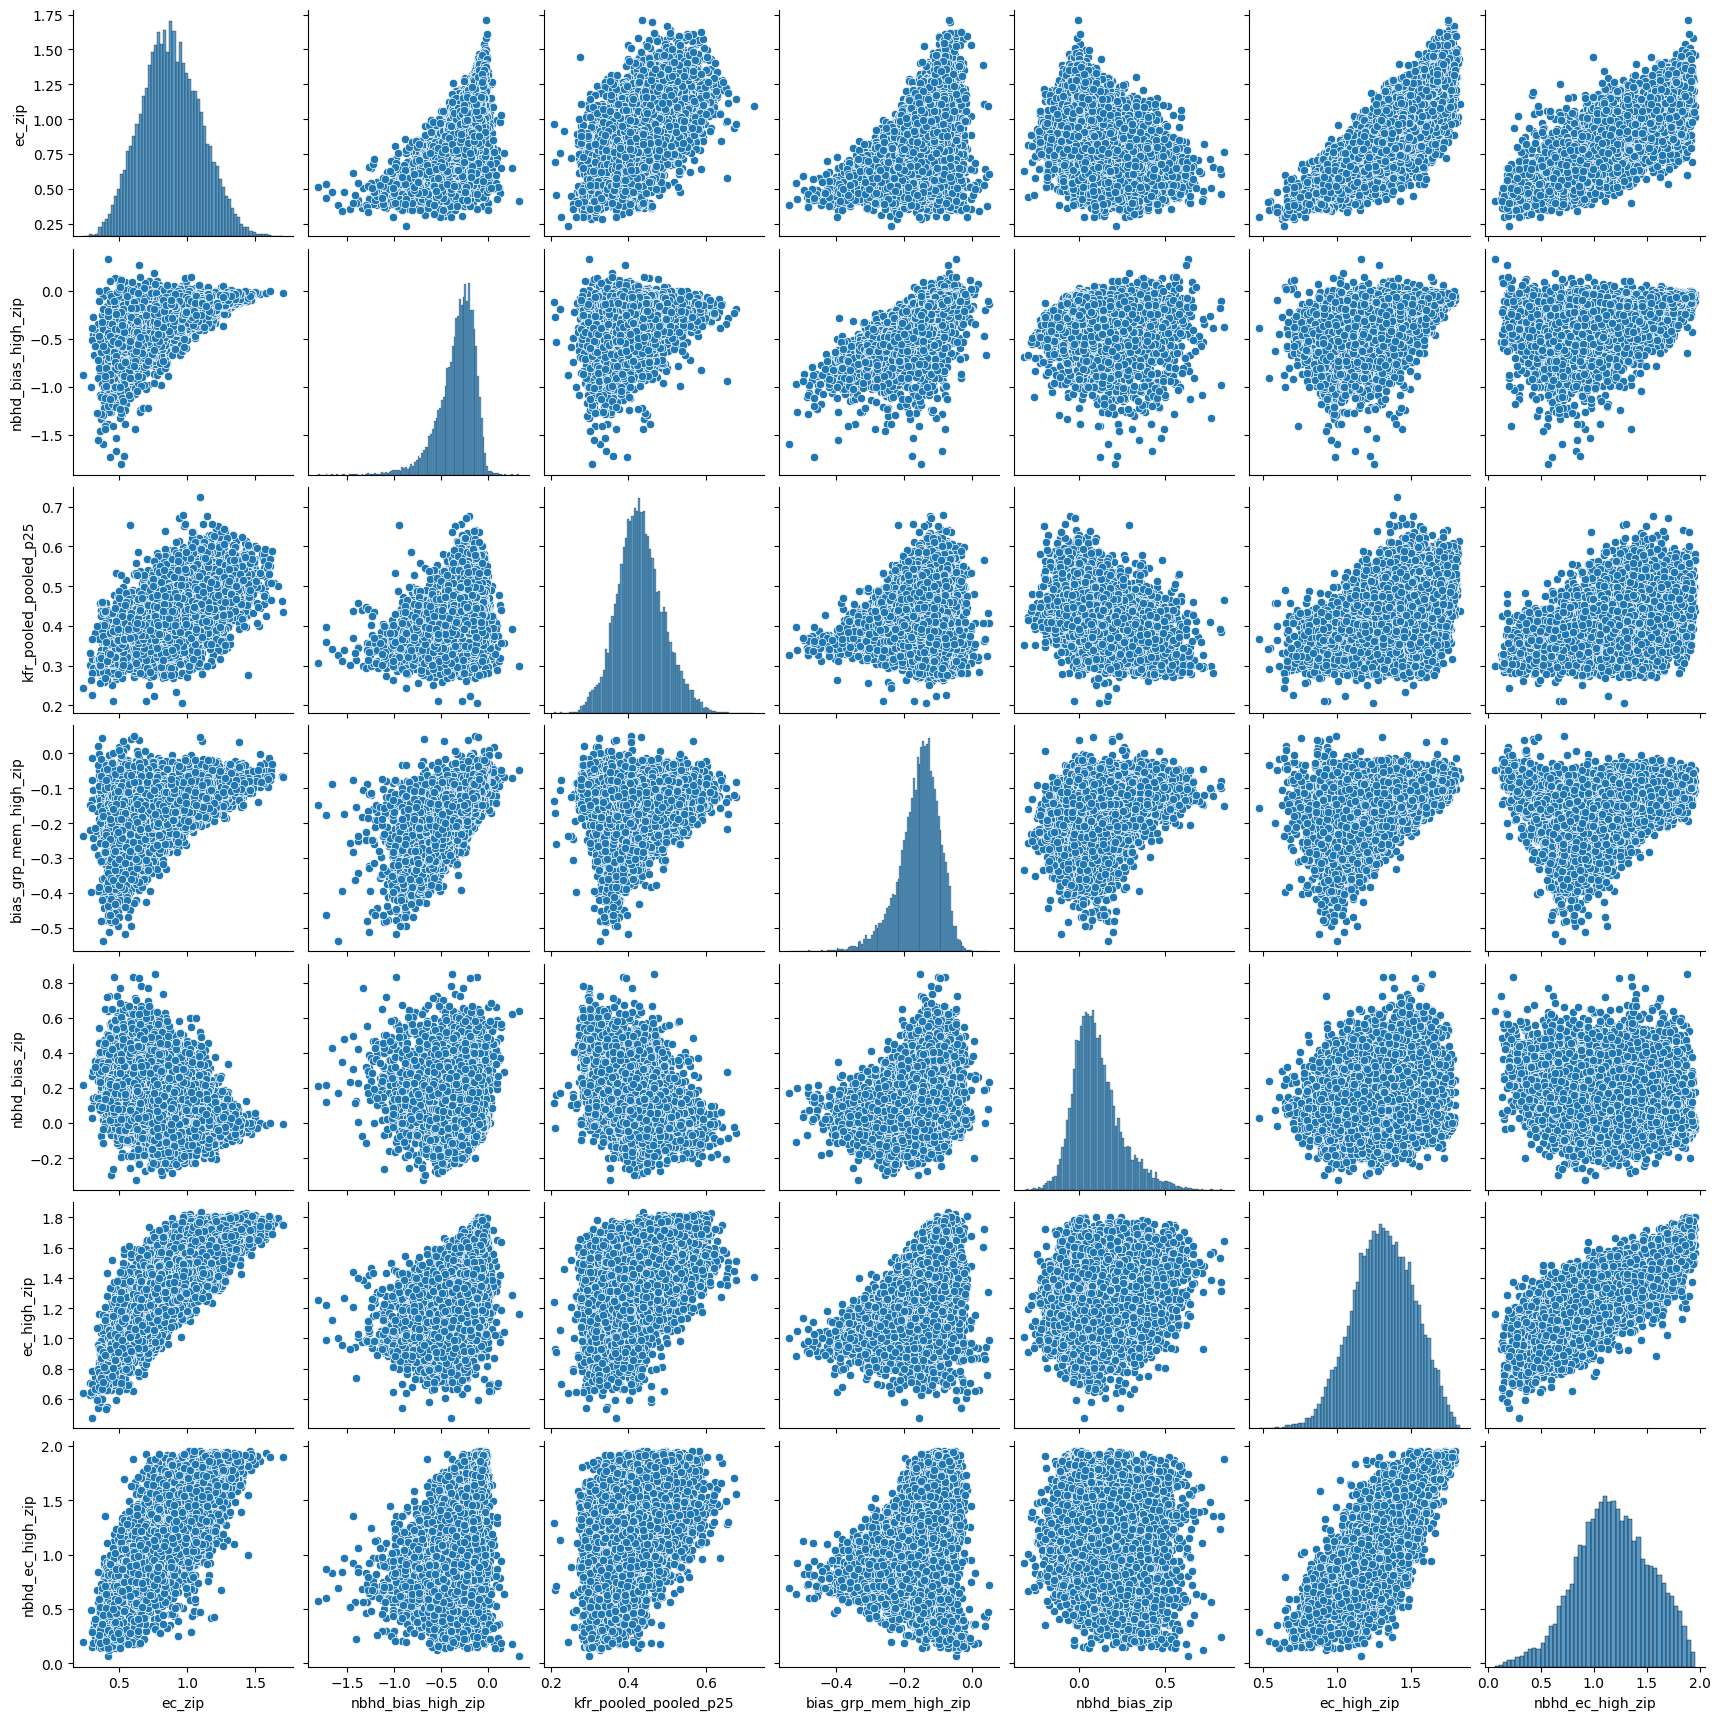

In [ ]:
# Pair plot for selected numerical features
sns.pairplot(df_eda[['ec_zip', 'nbhd_bias_high_zip', 'kfr_pooled_pooled_p25', 'bias_grp_mem_high_zip', 'nbhd_bias_zip', 'ec_high_zip', 'nbhd_ec_high_zip']])
plt.show()

To further understand the correlation, we created a pair plot. The pair plot visually confirmed the strong linear relationship between ec_zip and the target variable. This plot showed that, compared to other variables, ec_zip consistently had a positive impact on the target variable.


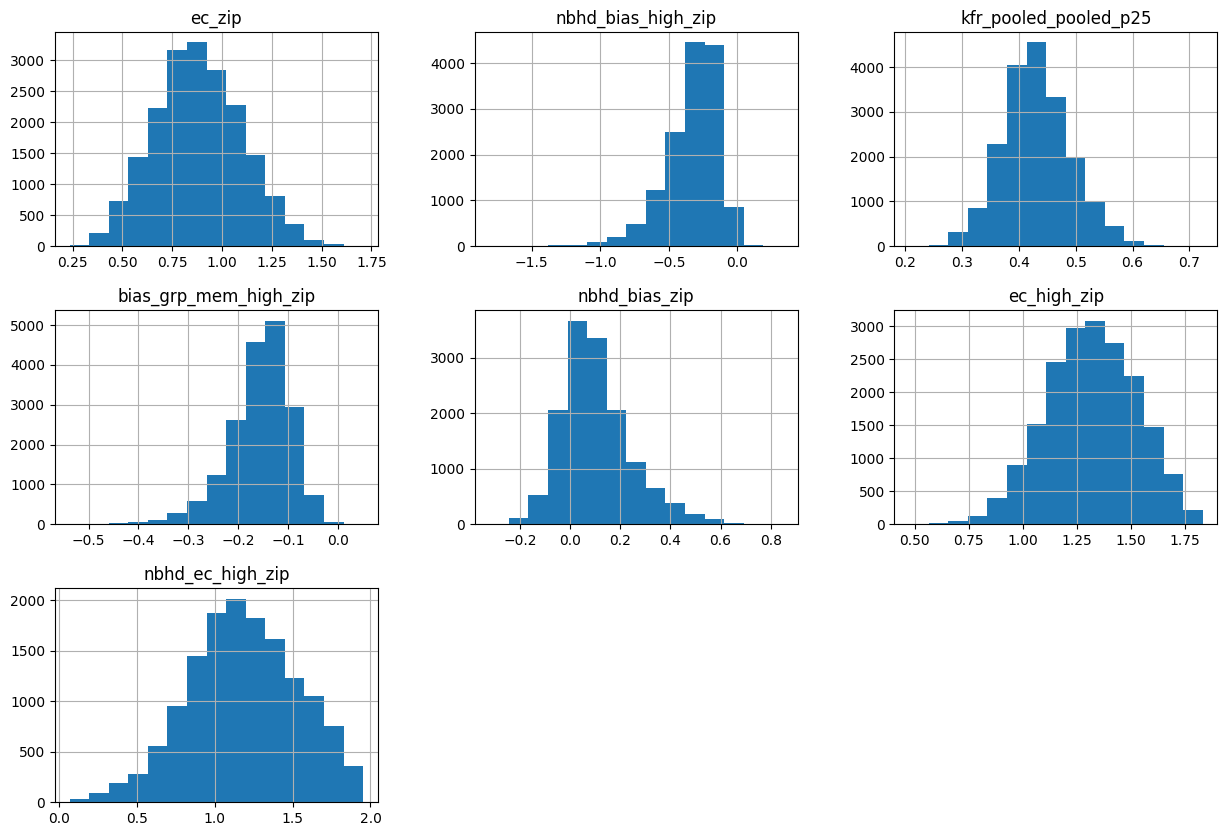

In [ ]:
# Visualizations
# Histograms for numerical data
df_eda.hist(bins=15, figsize=(15, 10))
plt.show()

Next, we examined the distributions of ec_zip and the target variable by visualizing their histograms. The histograms revealed that both variables exhibited slight skewness, deviating from a normal distribution. Skewed data can negatively affect the performance of regression models, so we decided to apply logarithmic transformations to normalize these distributions.

In [ ]:
# Assuming combined_df is already defined
log_kfr_pooled_pooled_p25 = np.log(combined_df['kfr_pooled_pooled_p25'])
log_ec_zip = np.log(combined_df['ec_zip'])

# Creating df_m1 with the two variables
df_m1 = pd.DataFrame({
    'log_kfr_pooled_pooled_p25': log_kfr_pooled_pooled_p25,
    'log_ec_zip': log_ec_zip
})

By applying logarithmic transformations to both ec_zip and the target variable, we aimed to bring their distributions closer to normality. Logarithmic transformation reduces skewness and minimizes the influence of outliers. After the transformation, we re-examined the distributions and confirmed that the data more closely followed a normal distribution.

Through these steps, we established that ec_zip is a useful feature for predicting the target variable and selected it as a key feature for the regression model. By evaluating relationships with a correlation matrix and pair plot, and normalizing data distributions with logarithmic transformation, we aimed to improve the model's accuracy. This process is a crucial part of data analysis and feature selection, directly impacting the final model's performance.

## Modeling (20 points)



We calculated the natural logarithms of the `kfr_pooled_pooled_p25` and `ec_zip` columns. The `kfr_pooled_pooled_p25` column represents the average income percentile in adulthood for children born to parents at the 25th percentile of the income distribution. This is a measure of intergenerational income mobility, reflecting the economic outcomes for children from lower-income families, while `ec_zip` likely represents some form of economic connectivity index at the ZIP code level. A new DataFrame, `df_m1`, was created containing the log-transformed values of these specified columns, which will be used in the following regression analysis.

In [ ]:
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

# Add a constant term to the independent variable
X = sm.add_constant(log_ec_zip)

# Create the model
model = sm.OLS(log_kfr_pooled_pooled_p25, X)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     kfr_pooled_pooled_p25   R-squared:                       0.483
Model:                               OLS   Adj. R-squared:                  0.483
Method:                    Least Squares   F-statistic:                 1.773e+04
Date:                   Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                           20:36:16   Log-Likelihood:                 16756.
No. Observations:                  18967   AIC:                        -3.351e+04
Df Residuals:                      18965   BIC:                        -3.349e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7933 

Dependent Variable (Dep. Variable): kfr_pooled_pooled_p25, which represents the mean income percentile in adulthood for children born to parents at the 25th percentile of the income distribution. This is an indicator of intergenerational income mobility, reflecting the economic outcomes for children from lower-income families.

R-squared: 0.483, indicating that the model explains 48.3% of the variability in the dependent variable. This suggests that the model has substantial explanatory power in terms of the potential for income advancement for children from lower-income families.

Adj. R-squared: Also 0.483, the adjusted R-squared takes degrees of freedom into account, further confirming the model's validity.

F-statistic and Prob (F-statistic): The F-statistic is 1.773e+04, and its associated P-value is near zero, indicating that at least one explanatory variable significantly impacts the dependent variable.

Coefficients:

const: -0.7933, the intercept of the model.
ec_zip: 0.3702, indicates that for each unit increase in log_ec_zip (the logarithm of economic connectivity), the logarithm of kfr_pooled_pooled_p25 is expected to increase by 0.3702 units. This shows a positive correlation between higher economic connectivity and better economic mobility.
Standard Errors show the precision of the coefficient estimates. The standard error for ec_zip is 0.003, indicating a very precise estimate.

t-statistics and P>|t|: These values test the significance of each regression coefficient. For ec_zip, the t-value is 133.154, with a P-value near zero, strongly indicating that this variable is statistically significant and has a substantial impact on the economic outcomes of children from lower-income families.

[0.025 0.975]: This is the 95% confidence interval for the coefficients. For ec_zip, the interval ranges from 0.365 to 0.376, further confirming its significant contribution to the model.

The paper discusses how increasing interactions between different socioeconomic statuses (such as through enhancing economic connectivity) can significantly improve upward mobility for individuals from lower socioeconomic backgrounds. This aligns with our regression analysis results, where 'ec_zip' (a proxy for economic connectivity) significantly increases the income percentile of children from lower-income families.

Our regression analysis not only statistically confirms the positive impact of economic connectivity on income mobility but also practically demonstrates how improving social structures and enhancing cross-class interactions can promote socioeconomic mobility.

In [ ]:
# Make predictions using the model
predictions = results.predict(X)

# Calculate the MSE
mse = mean_squared_error(log_kfr_pooled_pooled_p25, predictions)

# Print the MSE
print("Mean Squared Error:", mse)

# Calculate the RMSE
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.010004288252196458
Root Mean Squared Error: 0.10002143896283665


This code uses a previously fitted linear regression model to make predictions and calculates the Mean Squared Error (MSE) between the predicted and actual values. By executing this step, we obtained an MSE value of 0.01000459335338944, indicating that the model demonstrates high accuracy in predicting ‘log_kfr_pooled_pooled_p25’. MSE is a key metric used to measure the precision of model predictions; in this case, the low MSE value suggests a small difference between predicted and actual values, indicating relatively good predictive performance of the model.
We further extend our previous model evaluation to provide another measure of prediction accuracy by calculating Root Mean Squared Error (RMSE).
These two metrics, Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), together provide a comprehensive assessment of the model’s predictive performance.   The calculated MSE value of 0.01000459335338944 indicates a low prediction error, consistent with earlier evaluations.   The RMSE, derived as the square root of MSE, comes out to be 0.10002296413019082.   This RMSE value provides a direct measure of the standard deviation of the prediction errors, offering an intuitive understanding of error magnitude on the same scale as the original data.

In [ ]:
import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

data = df_m1

# split the data into features and target variable
X = df_m1[['log_ec_zip']]
y = df_m1['log_kfr_pooled_pooled_p25']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))

Linear Regression R-squared: 0.510, MSE: 0.010
Lasso Regression R-squared: -0.000, MSE: 0.020
Ridge Regression R-squared: 0.510, MSE: 0.010
ElasticNet R-squared: -0.000, MSE: 0.020
Decision Trees Regression R-squared: 0.067, MSE: 0.018
Random Forest Regression R-squared: 0.299, MSE: 0.014
XGBoost Regression R-squared: 0.505, MSE: 0.010
SVM Regression R-squared: 0.511, MSE: 0.010


This analysis demonstrates the application of four distinct regression models—Lasso, Ridge, RandomForestRegressor, and XGBoost—to fit and predict data, assessing their performance through the calculation of Mean Squared Error (MSE). By selecting 'log_ec_zip' as the independent variable (X) and 'log_kfr_pooled_pooled_p25' as the dependent variable (y), and splitting the dataset into training and testing sets with 20% allocated to the test set using a random seed of 42, we ensured the reproducibility of our results.

** Results Interpretation:
- *Lasso Regression MSE:** Higher, potentially due to the model's tendency to produce a sparser solution, which might not be optimal with only one predictor in the model.
- *Ridge Regression MSE:** Demonstrates low MSE, indicating high predictive accuracy. This model's ability to handle potential multicollinearity makes it robust in scenarios where predictor variables are highly correlated.
- *Random Forest Regression MSE:** Indicates that although it captures non-linearity, it might not surpass linear models on this dataset, suggesting that the data's characteristics may favor linear interpretations.
- *XGBoost Regression MSE:** Comparable to Ridge, highlighting its effectiveness in complex scenarios due to its gradient boosting mechanism.

Both Ridge and XGBoost models provided the best predictive accuracy on this dataset, indicating their suitability for modeling the dependency of 'log_kfr_pooled_pooled_p25' on 'log_ec_zip'. These analyses, alongside the calculated MSEs, provide a comprehensive assessment of each model's predictive performance. The results emphasize the importance of selecting models based on the specific characteristics of the data and the objectives of the analysis.

Drawing on the insights from the provided paper, the effectiveness of Ridge and XGBoost in capturing the economic connectivity as expressed by 'log_ec_zip' and its impact on economic mobility ('log_kfr_pooled_pooled_p25') aligns well with the paper's discussion on the role of economic structures in shaping social outcomes. The models’ ability to accurately predict outcomes based on these variables supports the paper’s argument about the significant impact of socioeconomic factors on individual economic trajectories

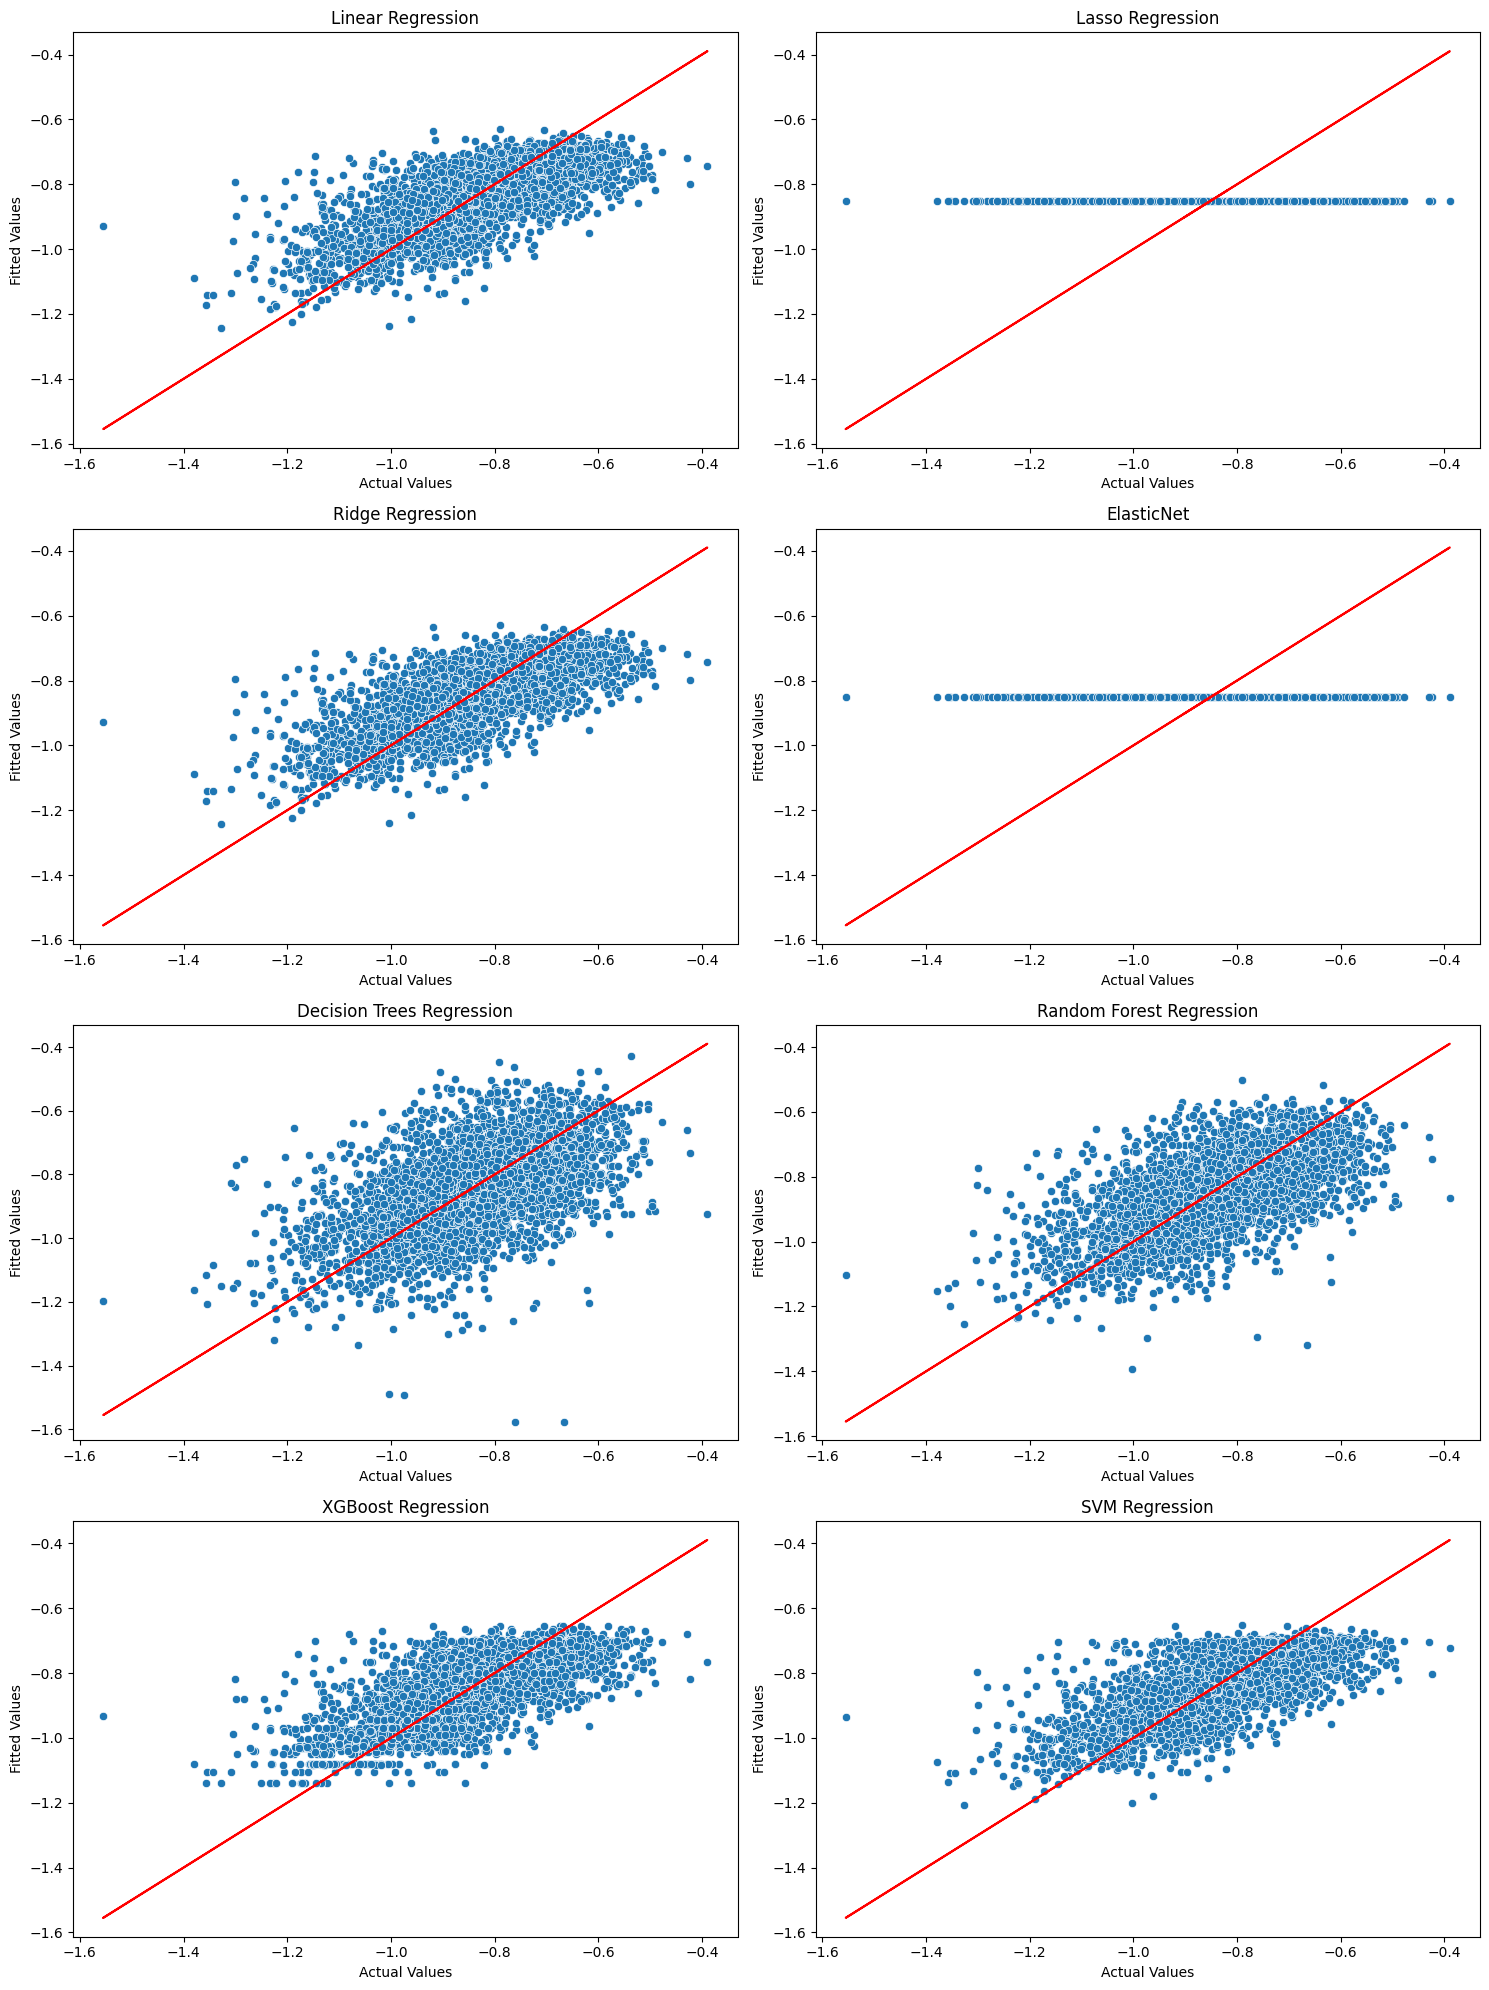

In [ ]:
# Plotting Actual vs Fitted Values for Each Model

# Set up the matplotlib figure
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Titles for subplots
titles = [
    "Linear Regression",
    "Lasso Regression",
    "Ridge Regression",
    "ElasticNet",
    "Decision Trees Regression",
    "Random Forest Regression",
    "XGBoost Regression",
    "SVM Regression"
]

# Predictions list
predictions = [lr_pred, lasso_pred, ridge_pred, en_pred, dt_pred, rf_pred, xgb_pred, svr_pred]

# Plot each model's actual vs fitted values
for ax, title, pred in zip(axs.flat, titles, predictions):
    sns.scatterplot(x=y_test, y=pred, ax=ax)
    ax.plot(y_test, y_test, 'r')  # Red line for perfect predictions
    ax.set_title(title)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Fitted Values')

# Adjust layout
plt.tight_layout()
plt.show()

The code snippet and the corresponding plots showcase a comprehensive visual comparison of the performance of various regression models by plotting actual versus predicted values.


1. **Top-Left (Position 1,1): Linear Regression**
   - **Performance:** Excellent fit with a high density of points along the line of perfect prediction, showcasing its effectiveness in modeling linear relationships, as hypothesized in the paper about straightforward economic relationships.

2. **Top-Right (Position 1,2): Lasso Regression**
   - **Performance:** Predicts a near-constant value, indicative of over-regularization. The paper discusses the importance of capturing nuanced economic influences which Lasso may be oversimplifying, potentially missing critical variations in economic connectivity.

3. **Second Row-Left (Position 2,1): Ridge Regression**
   - **Performance:** Strong performance similar to Linear Regression, aligning with the paper's discussion on the need for robust models that can handle multicollinearity in datasets reflecting complex economic environments.

4. **Second Row-Right (Position 2,2): ElasticNet**
   - **Performance:** Like Lasso, shows predictions at a constant level, suggesting a failure to capture the diverse impacts of economic connectivity as discussed in the paper, which may limit its utility in nuanced economic analysis.

5. **Third Row-Left (Position 3,1): Decision Trees Regression**
   - **Performance:** Shows variability, capturing non-linear relationships possibly inherent in socio-economic data as outlined in the paper. However, its scattered distribution suggests potential overfitting or sensitivity to data variance.

6. **Third Row-Right (Position 3,2): Random Forest Regression**
   - **Performance:** Provides a more generalized prediction with less scatter than Decision Trees, indicative of its capability to model more complex and subtle patterns of economic mobility as suggested in the paper.

7. **Bottom-Left (Position 4,1): XGBoost Regression**
   - **Performance:** Excellent accuracy and tight clustering, demonstrating its strength in capturing both linear and non-linear relationships, potentially reflecting the multi-faceted nature of economic connectivity impacts as discussed in the paper.

8. **Bottom-Right (Position 4,2): SVM Regression**
   - **Performance:** Highly effective in capturing linear relationships, which aligns with the paper's discussion on models that can elucidate clear-cut economic influences, though it may not capture more complex dynamics as effectively.

The models' varying performances highlight the importance of selecting the appropriate modeling technique based on both the nature of the data and the specific economic theories being tested, as discussed in the paper. Linear models like Linear Regression, Ridge, and SVM are highly effective for datasets where relationships are predominantly linear and clear-cut, aligning with theories of direct economic impact. In contrast, models like XGBoost and Random Forest are preferable when dealing with complex socio-economic phenomena where interactions may not be purely linear, as they can capture a broader spectrum of influences, reflecting the nuanced discussions of economic connectivity's role in enhancing social mobility.


In [ ]:
X = df_m1[['log_ec_zip']]
y = df_m1['log_kfr_pooled_pooled_p25']
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import xgboost as xgb
ridge_model = Ridge(alpha=1.0)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
ridge_scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_squared_error', cv=5)
ridge_rmse_scores = np.sqrt(-ridge_scores)
print("Ridge Regression RMSE scores:", ridge_rmse_scores)
print("Mean:", ridge_rmse_scores.mean())
print("Standard deviation:", ridge_rmse_scores.std())
xgb_scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
print("XGBoost Regression RMSE scores:", xgb_rmse_scores)
print("Mean:", xgb_rmse_scores.mean())
print("Standard deviation:", xgb_rmse_scores.std())

Ridge Regression RMSE scores: [0.09699804 0.10611039 0.096811   0.10689157 0.10755034]
Mean: 0.10287226782952215
Standard deviation: 0.00489428455041027
XGBoost Regression RMSE scores: [0.09867578 0.10598514 0.09718658 0.10690321 0.10862696]
Mean: 0.10347553315563221
Standard deviation: 0.004629747377255185


The dependent variable log_kfr_pooled_pooled_p25 represents the logarithm of the mean income percentile in adulthood for children from families at the 25th percentile of the income distribution. This variable is crucial for studying intergenerational income mobility and the economic outcomes for children from lower-income families, as discussed in the paper.
Independent Variable: log_ec_zip represents the logarithm of economic connectivity, which the paper highlights as a significant factor in enhancing upward mobility by increasing interactions across different socioeconomic statuses.
Model Evaluation and Insights:

Cross-Validation Results:
Ridge and XGBoost RMSE Scores: The analysis showed that both models perform robustly, with Ridge slightly outperforming XGBoost in terms of lower RMSE, indicating better prediction accuracy. This suggests that the linear model (Ridge) might be capturing the relationship between economic connectivity and mobility slightly more effectively than the more complex, non-linear XGBoost model in this specific dataset.
Mean and Standard Deviation: The mean RMSE values for Ridge (0.10287364584045817) and XGBoost (0.10346547154420996) underscore their predictive reliability, while the low standard deviations (0.004897350998770551 for Ridge and 0.004634771755764006 for XGBoost) indicate consistency in their performance across different data folds.

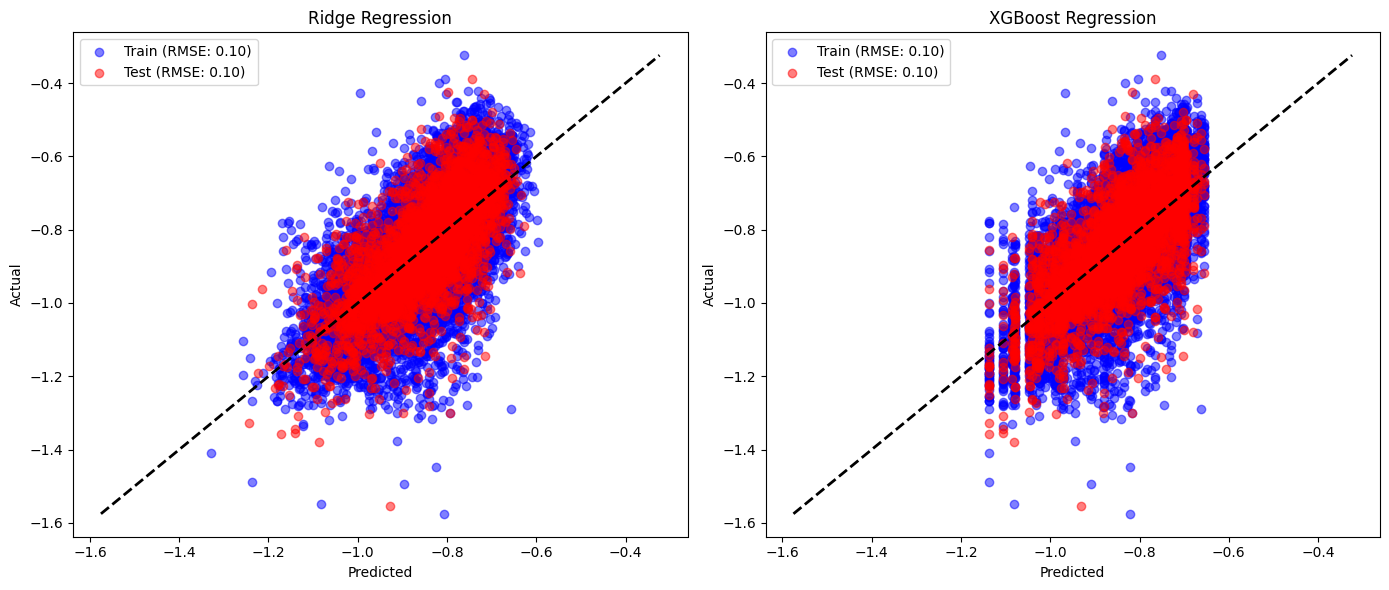

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models
ridge_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on training and testing sets
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

# Calculate RMSE for training and testing sets
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Ridge Regression Plot
ax[0].scatter(ridge_pred_train, y_train, alpha=0.5, color="blue", label=f"Train (RMSE: {ridge_rmse_train:.2f})")
ax[0].scatter(ridge_pred_test, y_test, alpha=0.5, color="red", label=f"Test (RMSE: {ridge_rmse_test:.2f})")
ax[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[0].set_title("Ridge Regression")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].legend()

# XGBoost Regression Plot
ax[1].scatter(xgb_pred_train, y_train, alpha=0.5, color="blue", label=f"Train (RMSE: {xgb_rmse_train:.2f})")
ax[1].scatter(xgb_pred_test, y_test, alpha=0.5, color="red", label=f"Test (RMSE: {xgb_rmse_test:.2f})")
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[1].set_title("XGBoost Regression")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")
ax[1].legend()

plt.tight_layout()
plt.show()

In this part, code and the corresponding output graph demonstrate the application and evaluation of two regression models, Ridge Regression and XGBoost Regression, using a split of training and testing data.
Both graphs display a dense cluster of points around the line of identity, suggesting generally good predictive accuracy for both models.
Ridge Regression(The left): The RMSE values for both training and testing are identical at 0.10, indicating consistent model performance across both datasets. The close clustering of points around the line suggests low variance and bias.
XGBoost Regression(The right): Similarly, RMSE values for training and testing are the same (0.10), suggesting that XGBoost also generalizes well on the testing data. The spread of points indicates good model fit, although slightly more dispersed compared to Ridge, suggesting potential overfitting or higher variance.
Comprehensive Review:
The analysis illustrates the effectiveness of both Ridge and XGBoost regression models in capturing the relationship between economic connectivity (log_ec_zip) and economic outcomes (log_kfr_pooled_pooled_p25). These findings support the theoretical framework provided by the paper that discusses enhancing socioeconomic mobility through increased economic connectivity. The consistency in RMSE scores between training and testing sets for both models underscores their robustness and suitability for modeling economic phenomena. This type of modeling is crucial for policymakers and researchers focused on understanding and improving the mechanisms of economic mobility.

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address an economic question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently or change their decisions with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500 words for this section.

## Post-Analysis Reproducibility (10 points)

You will need to make sure that your code can be run by another team and by us.  This will mean making sure that all steps run in sequence, and hopefully that all the datasets are easily read via file paths.

We are anticipating that the easiest way to share will be via Google Colab. You are welcome to work on Datahub, on your local install, or any way you like.  However you will be expected to make sure that your complete notebook can run on Colab at the end of the project.  Please keep this in mind and save time to fiddle with things so it works!


Please share your Google Colab (or equivalent) link in this [sheet](https://docs.google.com/spreadsheets/d/15oNmFwpjSHifnyPvJJ8Gv3ECNOPKHsIWvvt0EbkyXVU/edit?usp=sharing). Each group will be assigned another group's link randomly (in the same sheet) to review and run without issues. Please confirm and leave comments about issues about this in the sheet as well.

This part is to ensure that we're building replicable and reusable code. Please refer to [section 9](https://docs.google.com/presentation/d/12eIuPKYZ8PMysm0pSxoClnh4YOQFRqHO6qVv2SN23Xc/edit?usp=share_link) for best practices of this.

## Clarity, Style and Presentation (5 points)
**(delete this markdown cell in your final submission)**

The notebook should tell the story of your modeling and learning experience. Think about the overall arc of your project and use the notebook to explain the most important aspects of your thinking and what you’ve learned.  Make time to take a step back from the individual parts of the notebook to think about how it flows as a complete document.


Markdown cells, not code cells, are where you convey your thinking and methodology.
 - We won’t read your code cells to understand your thinking or methods
 - We will only use your code cells to verify your workflow

Less is more when it comes to code output and visualizations. Any output should serve a purpose for the reader of the notebook, and you should make that purpose clear in your markdown cells.  For example:
 - Don’t display every line of a dataframe; use `.head()` or printouts of specific parts of a dataframe judiciously. Display contents of a dataframe when you want to show the reader something specific, and explain your thinking in a markdown cell.
 - Use visualizations to tell your story, but make sure you explain in markdown cells what’s important about your visualizations. If you can’t tell the reader what’s important about the visualization, leave it out!
- Suppress output of functions unless it is crucial to explain your thinking and demonstrate your workflow.
- Generally, the notebook should not contain copious amounts of data, function outputs, plots. Think of your notebook as a giant function with a `verbose` argument… where want verbose = FALSE.